# 1-Import Libraries

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


# 2- Loading the data

In [4]:
car_data = fetch_openml(name='car',version=2,parser='auto')
type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [7]:
car_data.details['version']

'2'

In [10]:
#displaying feature names
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [11]:
#getting whole dataframe
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [12]:
type(car_data)

pandas.core.frame.DataFrame

# 3-Exploratory Analysis

In [15]:
#splitting data into training and testing

train_data,test_data = train_test_split(car_data, test_size=0.3, random_state=20)
print('The size of training data is: {}\nThe size of testing data is: {}'.format(len(train_data),len(test_data)))

The size of training data is: 1209
The size of testing data is: 519


In [18]:
#checking summary statistics

#checking categorical data
train_data['buying'].value_counts()

med      327
high     307
vhigh    291
low      284
Name: buying, dtype: int64

In [19]:
train_data['maint'].value_counts()

high     311
med      311
vhigh    294
low      293
Name: maint, dtype: int64

In [20]:
train_data['doors'].value_counts()

5more    319
2        312
4        296
3        282
Name: doors, dtype: int64

In [21]:
train_data['persons'].value_counts()

more    418
2       407
4       384
Name: persons, dtype: int64

In [22]:
train_data['lug_boot'].value_counts()

big      411
med      405
small    393
Name: lug_boot, dtype: int64

In [23]:
train_data['safety'].value_counts()

med     406
low     402
high    401
Name: safety, dtype: int64

In [24]:
train_data['binaryClass'].value_counts()

P    849
N    360
Name: binaryClass, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

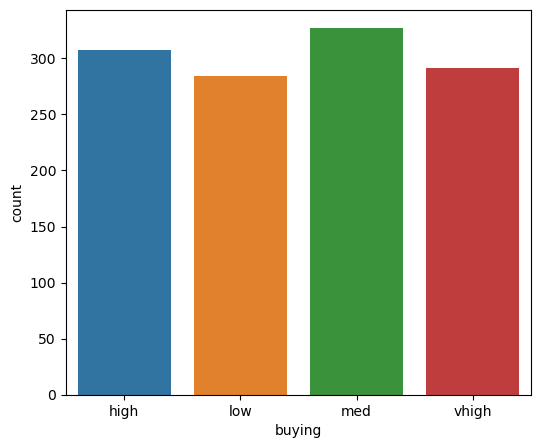

In [27]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='buying')
#med people have high chances of buying a car

<Axes: xlabel='maint', ylabel='count'>

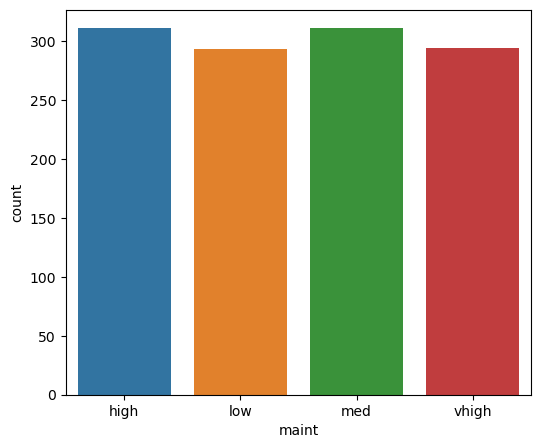

In [28]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='doors', ylabel='count'>

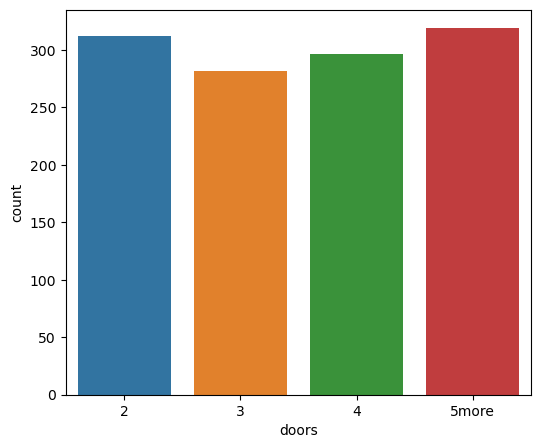

In [29]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='doors')

<Axes: xlabel='persons', ylabel='count'>

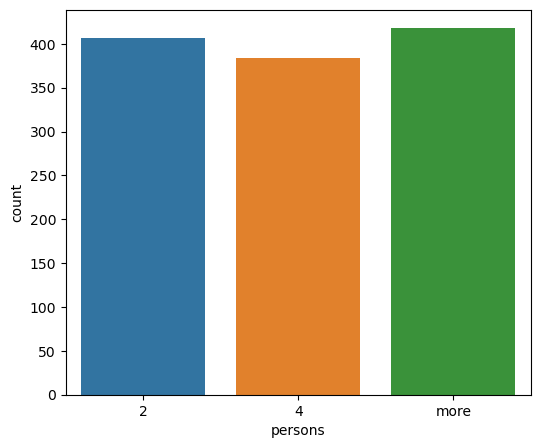

In [30]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='persons')

<Axes: xlabel='lug_boot', ylabel='count'>

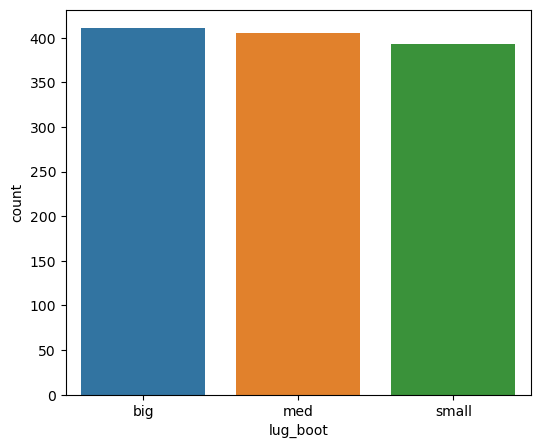

In [31]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='lug_boot')

<Axes: xlabel='safety', ylabel='count'>

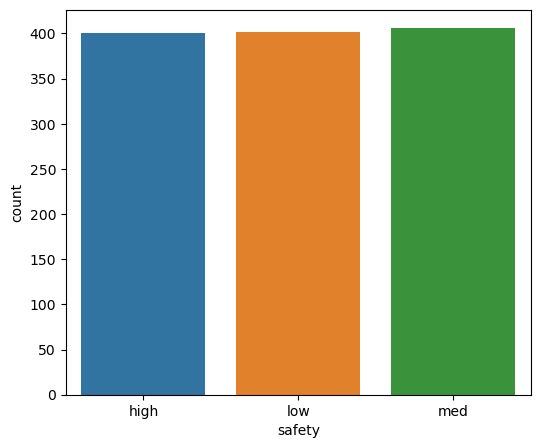

In [32]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='safety')

<Axes: xlabel='binaryClass', ylabel='count'>

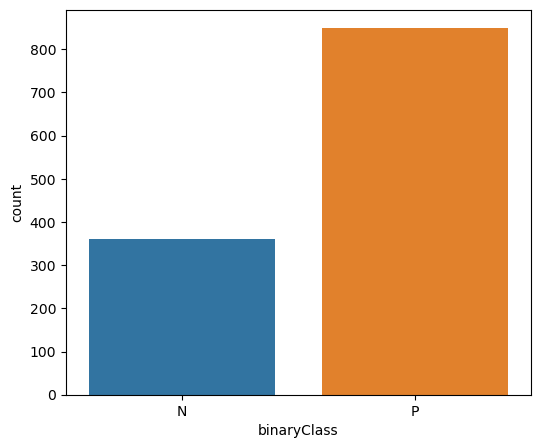

In [33]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='binaryClass')

<Axes: xlabel='buying', ylabel='count'>

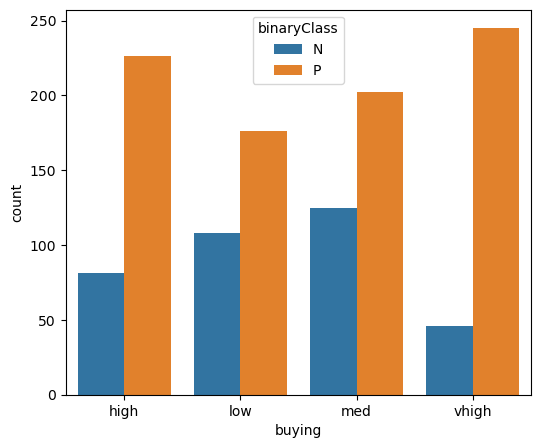

In [35]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='buying',hue='binaryClass')

<Axes: xlabel='maint', ylabel='count'>

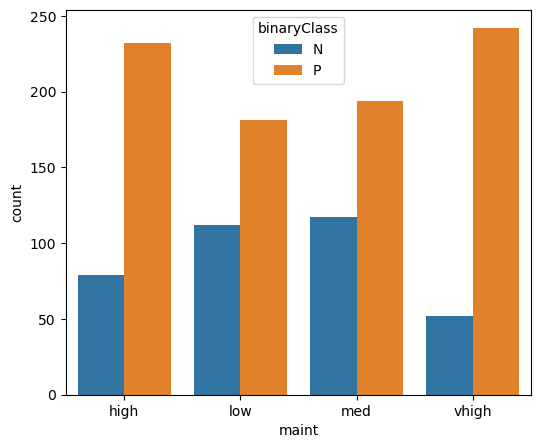

In [36]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='maint',hue='binaryClass')

<Axes: xlabel='persons', ylabel='count'>

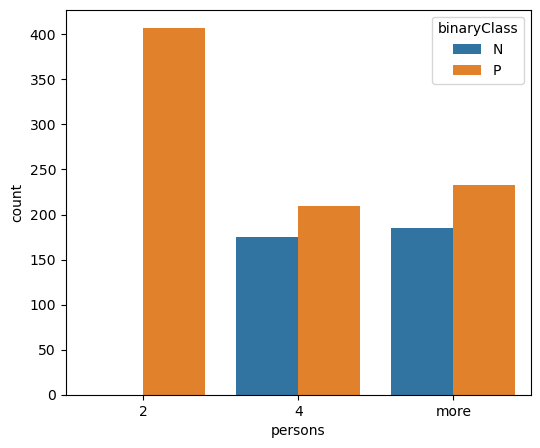

In [37]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='persons',hue='binaryClass')

<Axes: xlabel='doors', ylabel='count'>

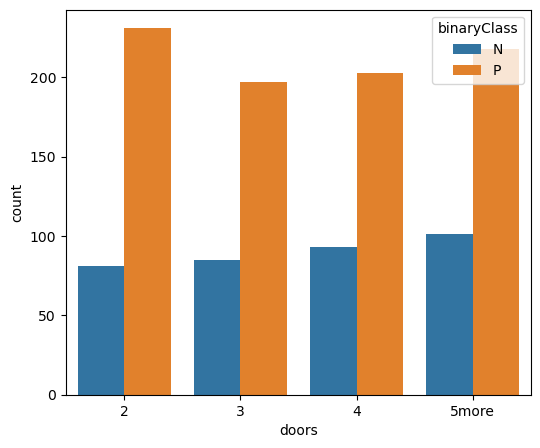

In [38]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='doors',hue='binaryClass')

<Axes: xlabel='lug_boot', ylabel='count'>

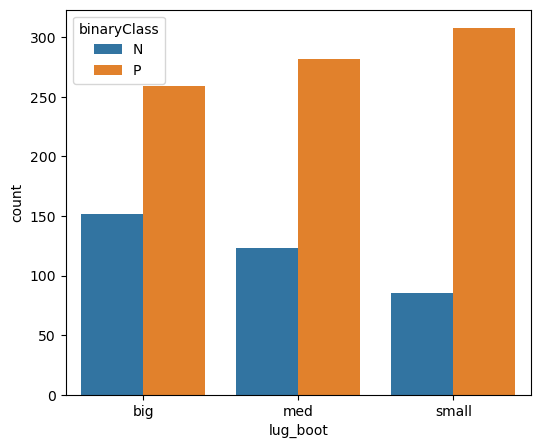

In [39]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='lug_boot',hue='binaryClass')

<Axes: xlabel='safety', ylabel='count'>

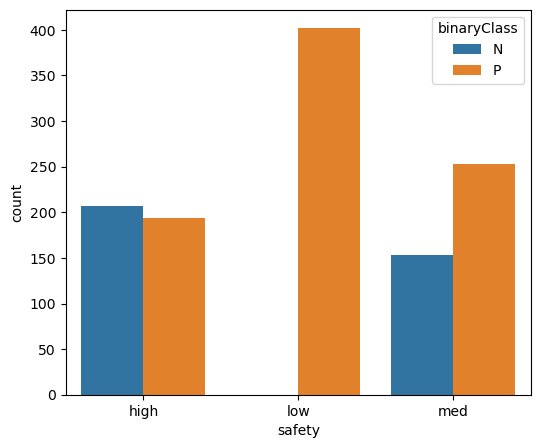

In [42]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='safety',hue='binaryClass')

# 4- Data processing

In [47]:
#before handling categorical features, create a training input data and labels
car_train = train_data.drop('binaryClass',axis=1)
car_labels = train_data[['binaryClass']]

In [46]:
#create pipelint to encode all features in training input data
pipe = Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared = pipe.fit_transform(car_train)

In [49]:
label_enc = LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_labels)

C:\Users\seeth\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 5- Training Desicion Tree classifier

In [54]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

# 6- Evaluating Desicion Trees

In [63]:
from sklearn.metrics import accuracy_score

def accuracy(input_data, model, labels):
    """ Take input data, model and labels and return accuracy"""
    preds = model.predict(input_data)
    acc = accuracy_score(labels, preds)
    return acc

In [64]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """Take input data, model and labels and return confusion matrix"""
    preds = model.predict(input_data)
    cm = confusion_matrix(labels, preds)
    return cm

In [65]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    """Take input data, model and labels and return confusion matrix"""
    preds = model.predict(input_data)
    report = classification_report(labels, preds)
    report = print(report)
    return report

In [66]:
accuracy(car_train_prepared, tree_clf, car_labels_prepared)
#desicion trees overfitted the dataset and our data is not balanced because we have many positive examples than negative

1.0

In [67]:
conf_matrix(car_train_prepared, tree_clf, car_labels_prepared)

array([[360,   0],
       [  0, 849]], dtype=int64)

In [68]:
class_report(car_train_prepared, tree_clf, car_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

